# Problem 1 : Predicting SalePrice using GrLivArea
Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71. In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.




Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split. 

o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too. 

o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

sns.set()

In [2]:
dataset_house = pd.read_csv('./data/train.csv')
df_house = pd.DataFrame(dataset_house)
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

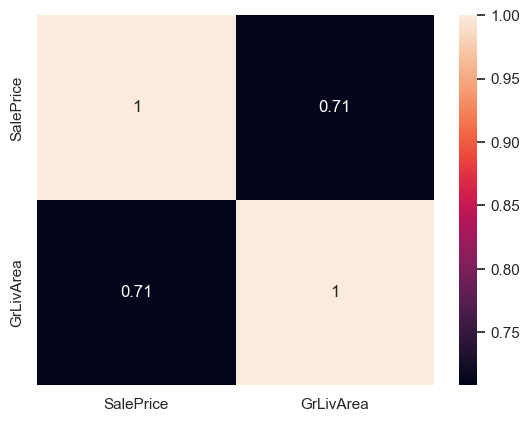

In [3]:
sns.heatmap(dataset_house[['SalePrice', 'GrLivArea']].corr(), annot=True)

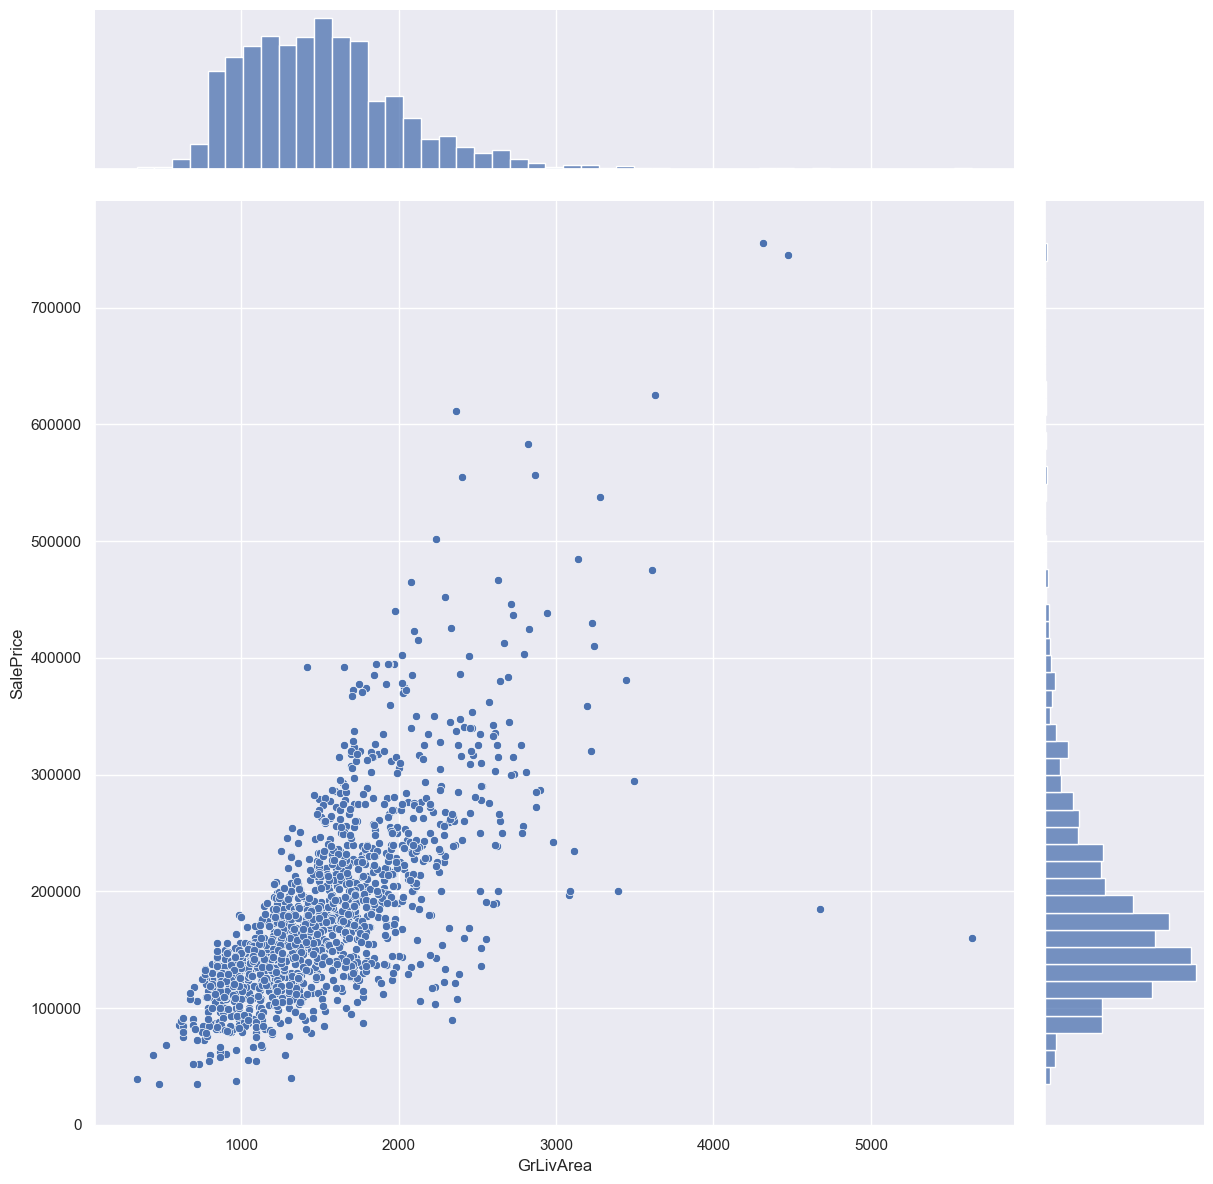

In [4]:
sns.jointplot(data = dataset_house, x = "GrLivArea", y = "SalePrice", height = 12)


Intercept 	: b = 24899.75
Coefficients 	: a = 102.49

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 3078116053.86
Explained Variance (R^2) 	: 0.48

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3418946311.18
Explained Variance (R^2) 	: 0.55
Accuracy of the model:   	: 0.55


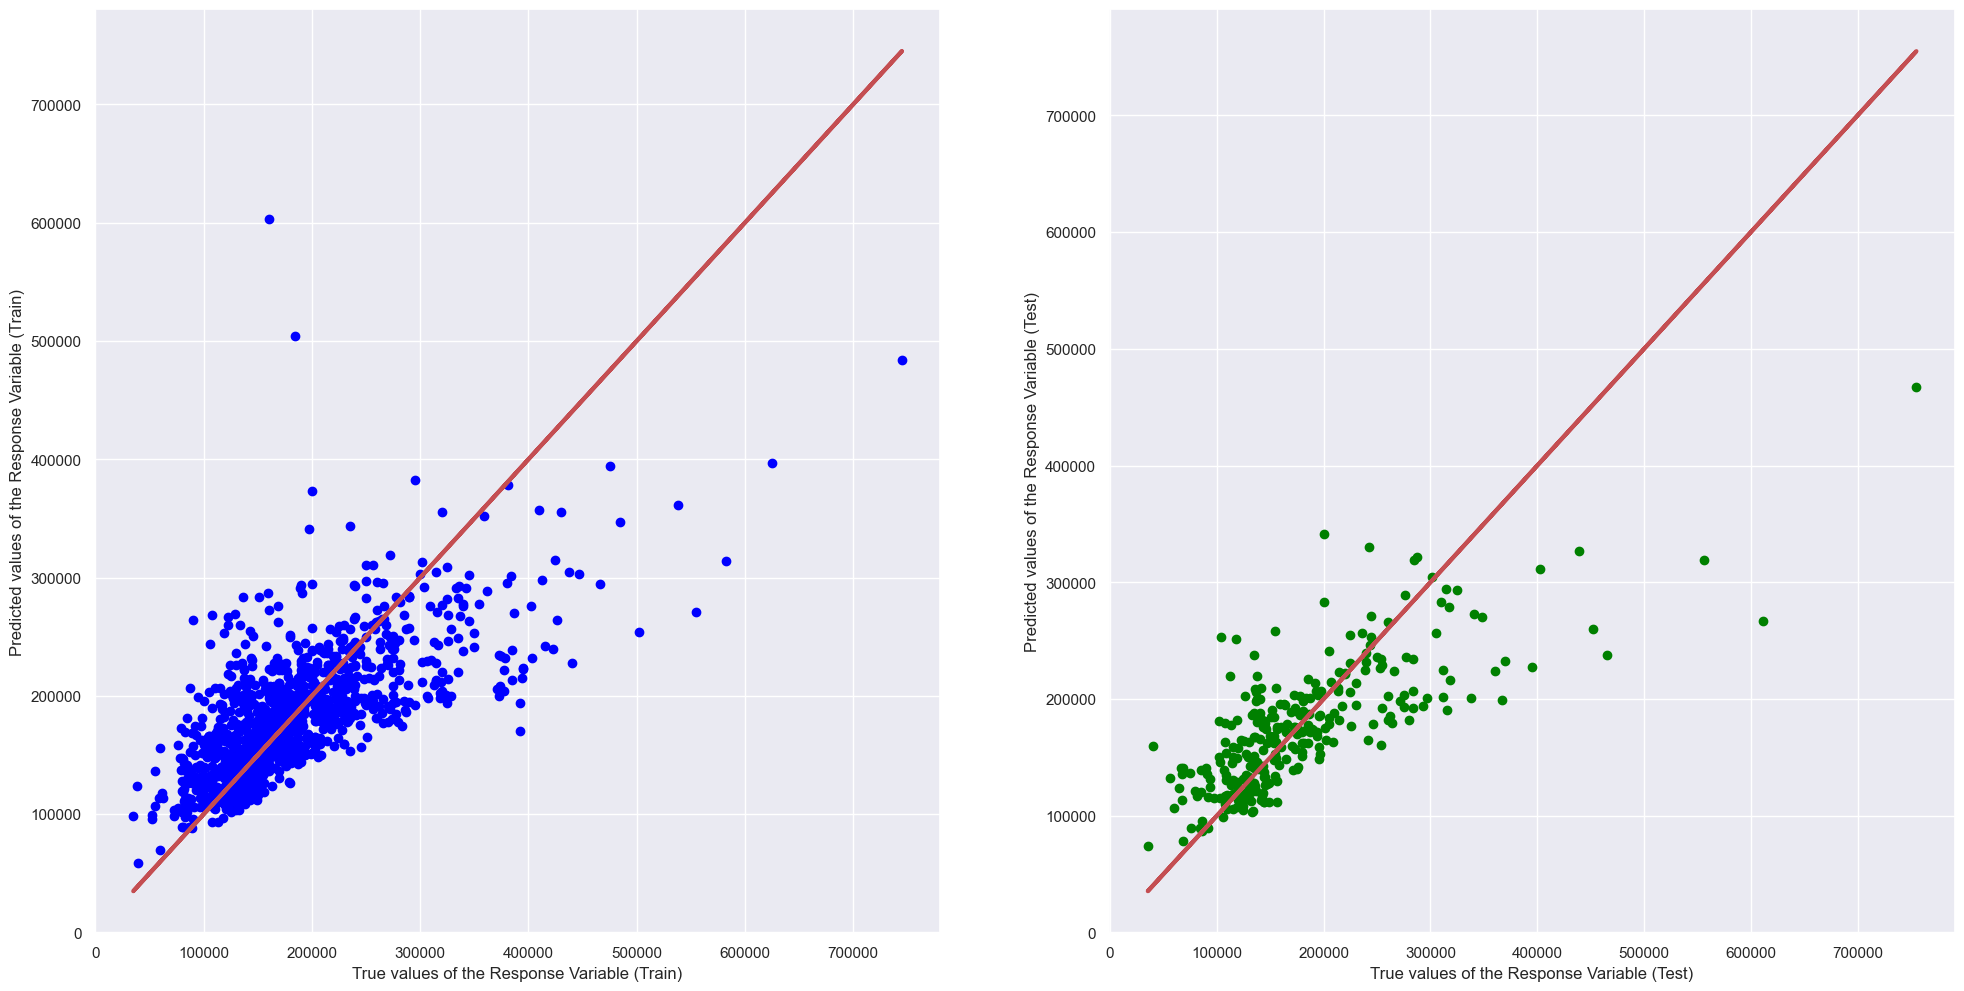

In [5]:
def lr(X, y, df):
    
    
    X = pd.DataFrame(df[X])
    y = pd.DataFrame(df[y])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train ,y_train)
    
     # Predict Response corresponding to Predictors
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Intercept \t: b = %.2f' % model.intercept_[0])
    print('Coefficients \t: a = %.2f' % model.coef_[0][0])

    
    # Check the Goodness of Fit (on Train Data)
    print("\nGoodness of Fit of Model \tTrain Dataset")
    print('Mean Squared Error (MSE) \t: %.2f' % mean_squared_error(y_train, y_train_pred))
    print('Explained Variance (R^2) \t: %.2f' % r2_score(y_train, y_train_pred))

    # Check the Goodness of Fit (on Test Data)
    print("\nGoodness of Fit of Model \tTest Dataset")
    print('Mean Squared Error (MSE) \t: %.2f' % mean_squared_error(y_test, y_test_pred))
    print('Explained Variance (R^2) \t: %.2f' % r2_score(y_test, y_test_pred))
    print('Accuracy of the model:   \t: %.2f' % model.score(X_test, y_test))

    f, axes = plt.subplots(1, 2, figsize=(24, 12))

    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

    
lr(X='GrLivArea', y='SalePrice', df=dataset_house)

# Problem 2 : Predicting SalePrice using Other Variables
Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

Answer: By using R2, we can see that <code>GrLivArea</code> has the best R2 score compared to <code>TotalBsmtSF</code> and <code>GarageArea</code>. The higher the R2 score, the better the correlation. By using MSE, it can be said that the <code>GrLivArea</code> is the lowest compared to <code>TotalBsmtSF</code> and <code>GarageArea</code>. The lower the MSE score, the better the prediction. Hence, this shows that <code>GrLivArea</code> is the best in predicting <code>SalePrice</code> compared to the other 2 features

|                                               | **_GrLivArea_** | **_TotalBsmtSF_** | **_GarageArea_** |
|:---------------------------------------------:|:---------------:|:-----------------:|:----------------:|
|                                  Coefficients |     102.49     |      104.81       |      228.44      |
|                                    Intercepts |    24899.75    |     70161.50      |     72640.21     |
| **Goodness of Fit metrics on Test DataSet**  |               |                   |                  |
|                           Mean Squared Error |  3418946311.18  |   4367149593.60   |   4716105272.38  |
|                                           R2 |       0.55      |        0.43       |       0.39       |
|                        Accuracy of the model |       0.55      |        0.43       |       0.39       |
| **Goodness of Fit metrics on Train DataSet** |                 |                   |                  |
|                           Mean Squared Error |  3078116053.86  |   3833273184.74   |   3641063673.83  |
|                                           R2 |       0.48      |        0.36       |       0.39       |



<AxesSubplot:>

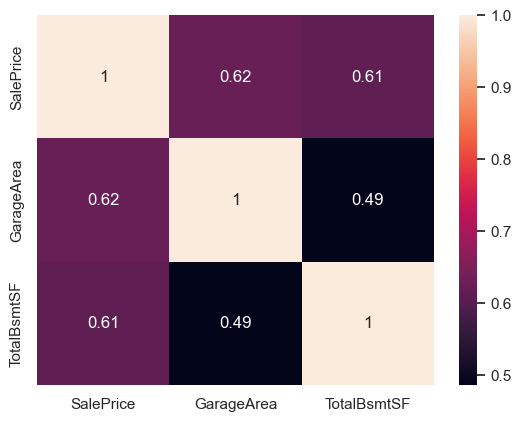

In [6]:
features_2 = ['SalePrice', 'GarageArea', 'TotalBsmtSF']
sns.heatmap(dataset_house[features_2].corr(), annot=True)

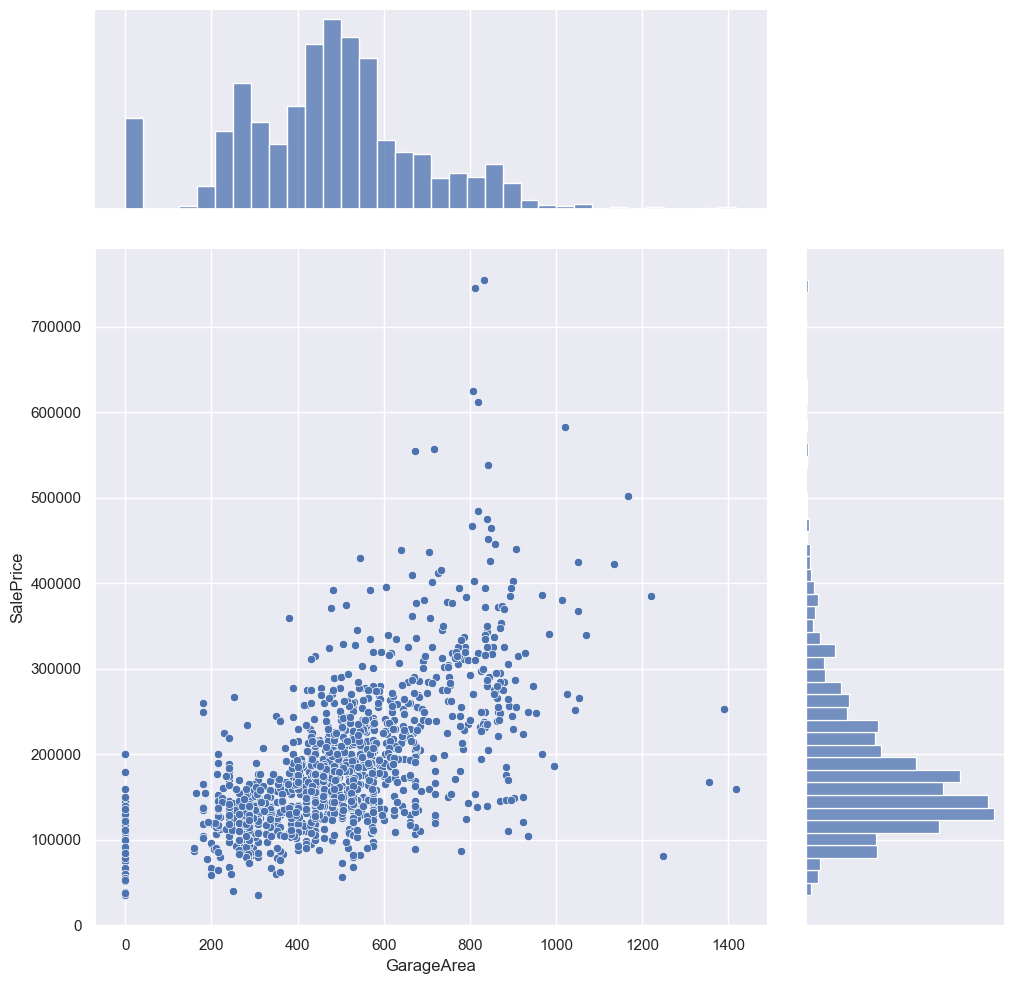

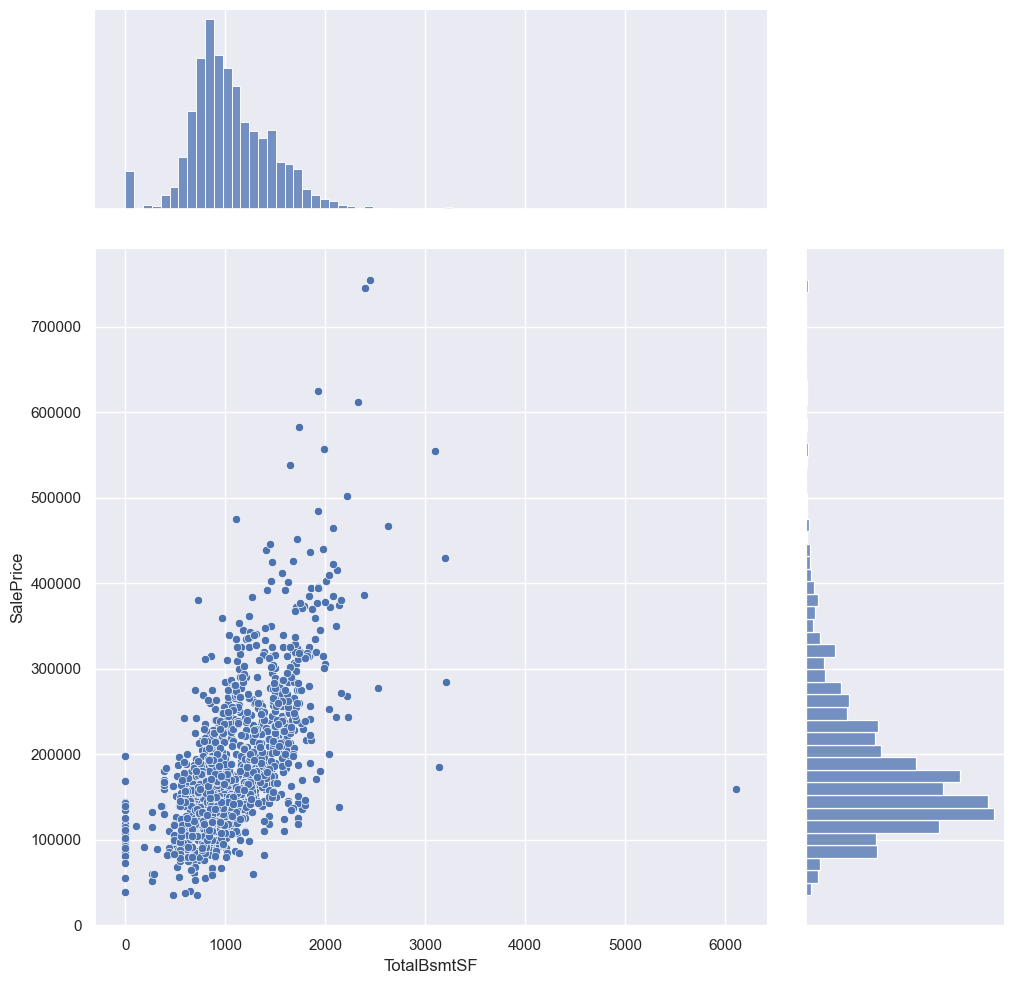

In [7]:
for feature in features_2:
    if feature != 'SalePrice':
        sns.jointplot(x=feature, y="SalePrice", data=dataset_house, height=10, ratio=3)

Intercept 	: b = 70161.50
Coefficients 	: a = 104.81

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 3833273184.74
Explained Variance (R^2) 	: 0.36

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4367149593.60
Explained Variance (R^2) 	: 0.43
Accuracy of the model:   	: 0.43


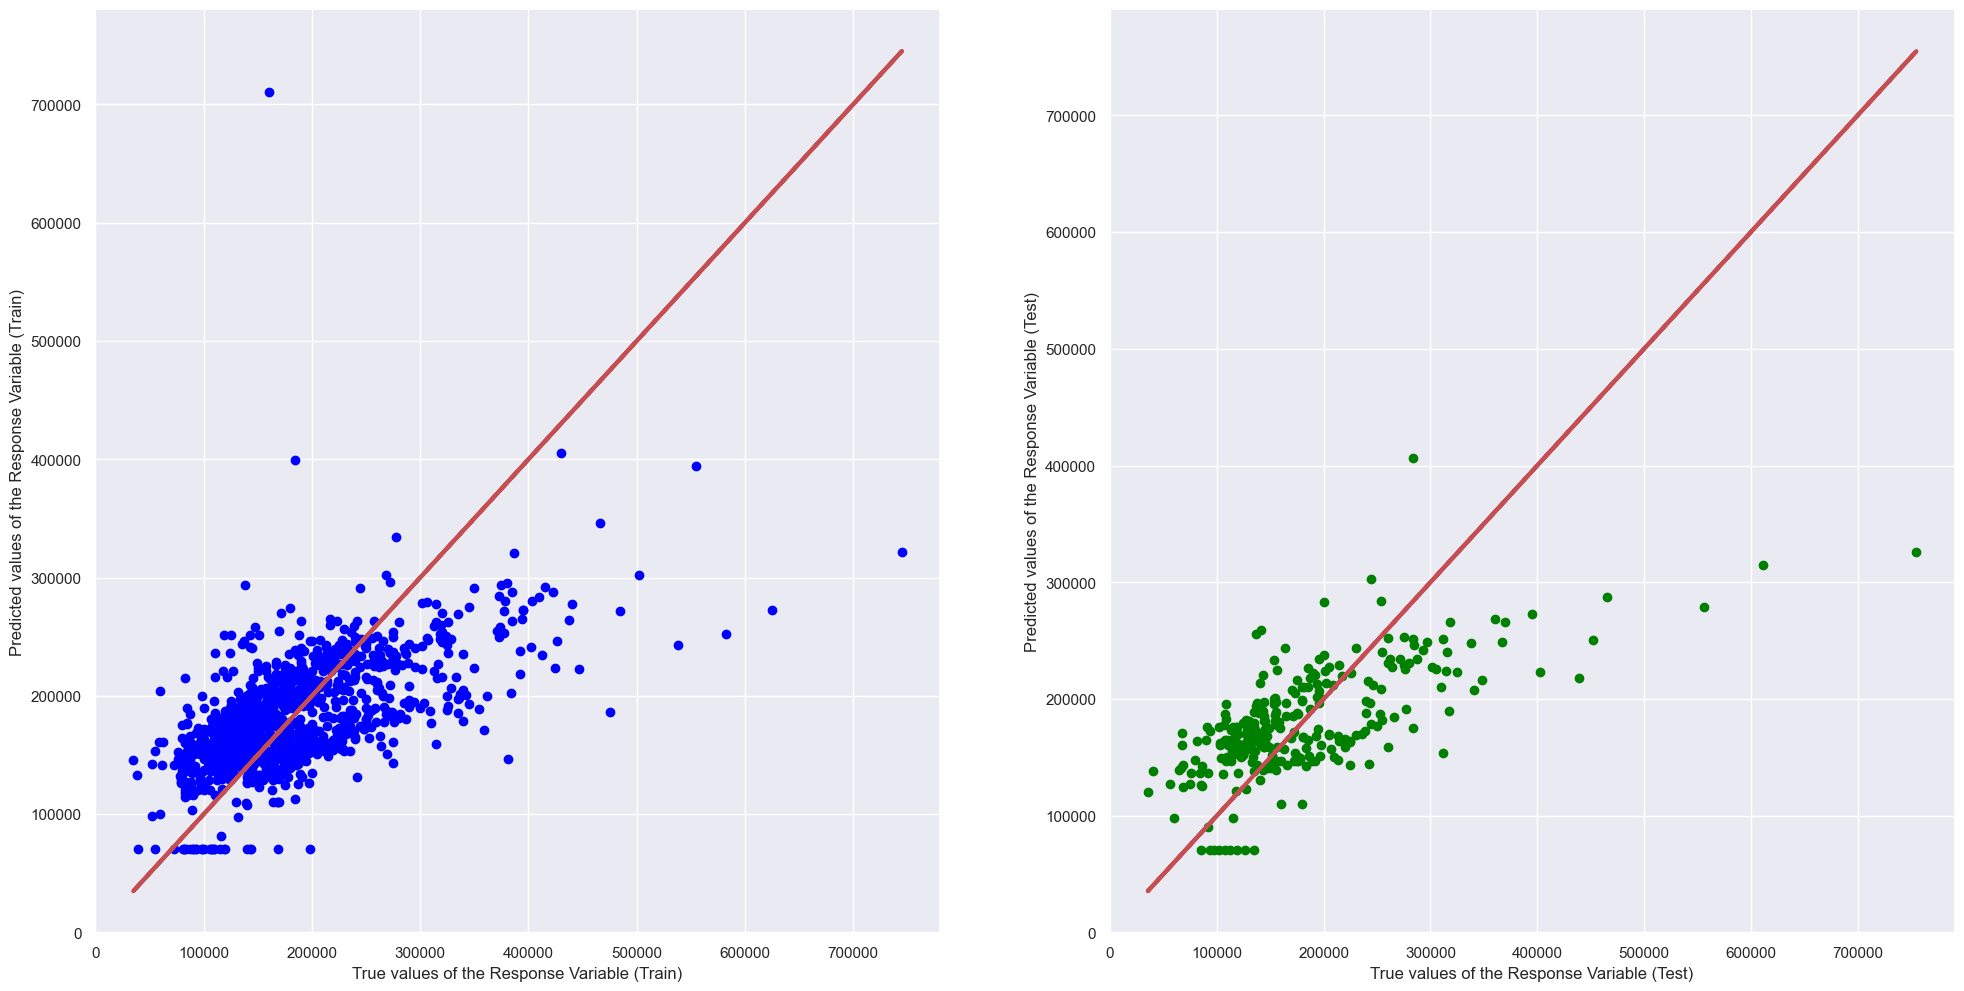

In [8]:
lr(X='TotalBsmtSF', y='SalePrice', df=dataset_house)

Intercept 	: b = 72640.21
Coefficients 	: a = 228.44

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 3641063673.83
Explained Variance (R^2) 	: 0.39

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4716105272.38
Explained Variance (R^2) 	: 0.39
Accuracy of the model:   	: 0.39


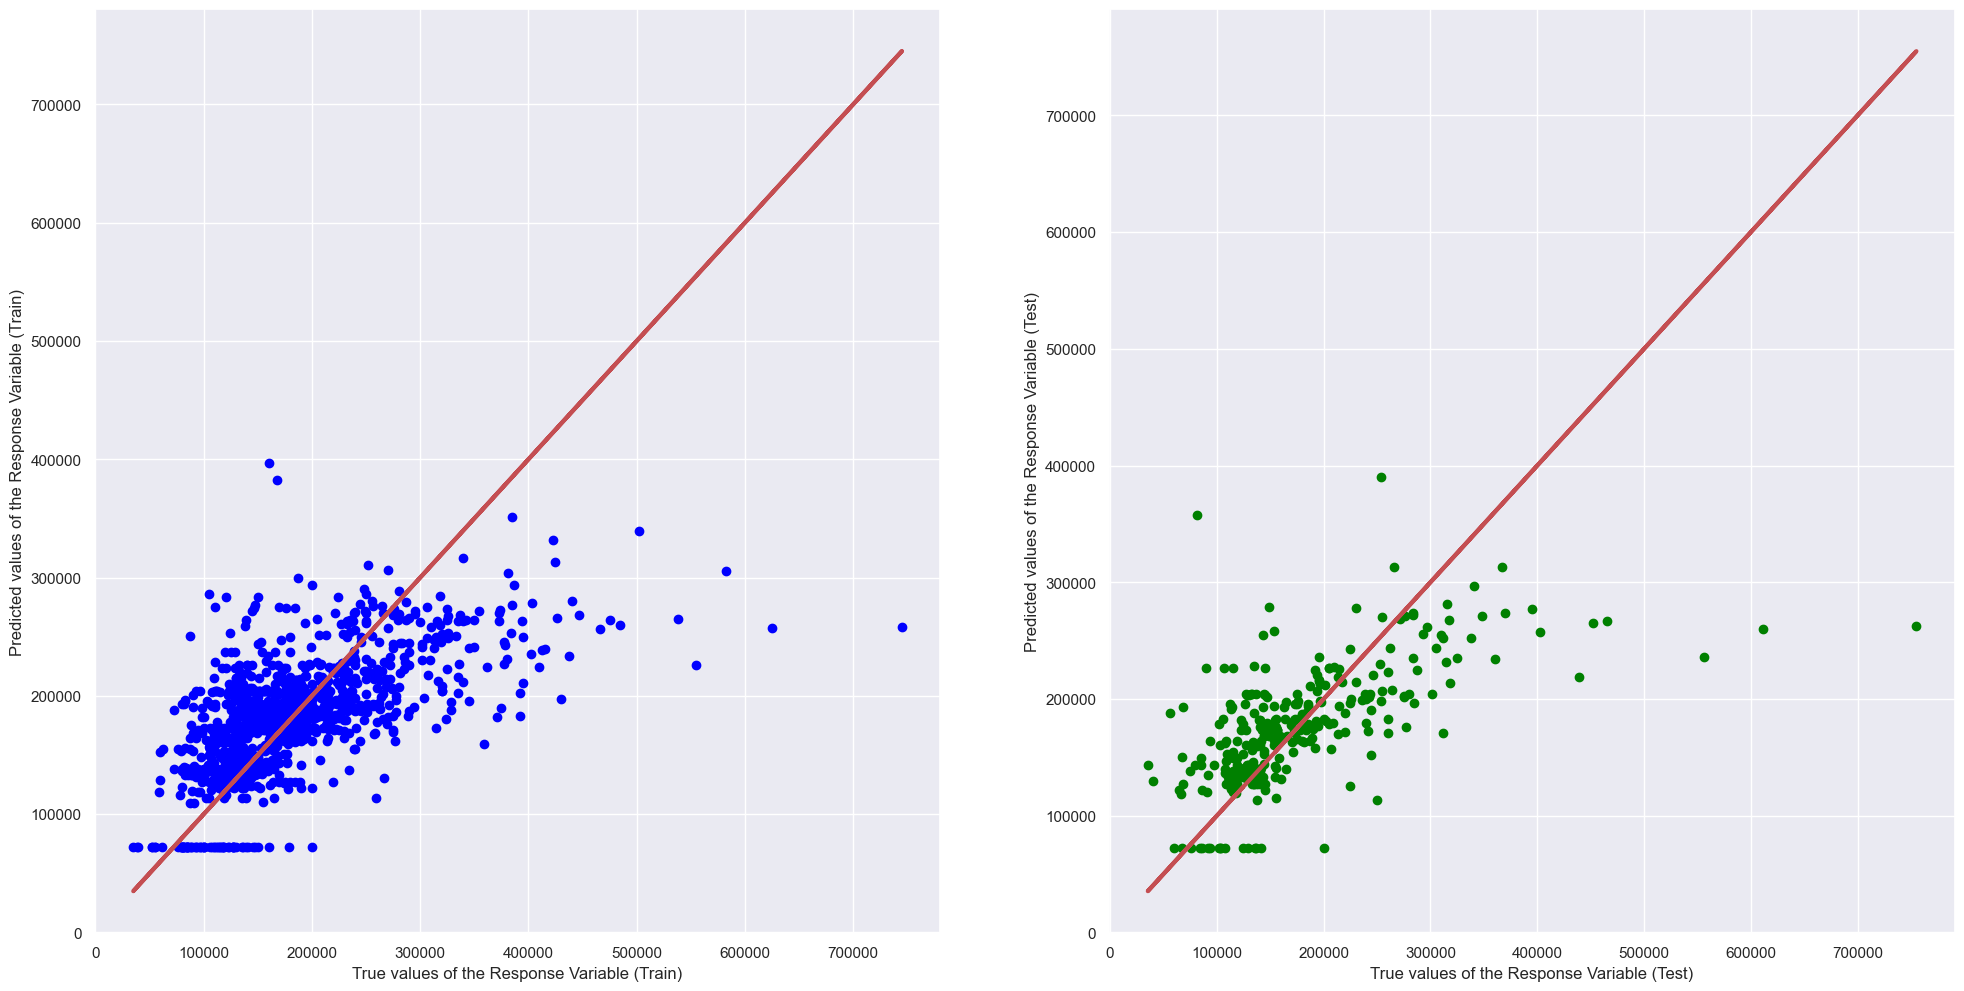

In [9]:
lr(X='GarageArea', y='SalePrice', df=dataset_house)

# Problem 3 : Refining the Models to Predict SalePrice
In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

(a) Find the houses(rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a LinearRegression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.

Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

Hints and Pointers

o In Part (a), there are houses that are outliers on both variables (intersection), but we really want the “union”.

o Part (b) is the same as Problem 1, just on the new outlier-free dataset. Check that the data now has less rows. 

o Part (c) is the same as Problem 2, but keep in mind that the dataset has changed in this case, not the variables.

Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

Answer: With the outliers removed, the model shows a better result. With R2 being a statistical measure of how close data is being fitted onto the regression line, the model with the outliers removed shows a small decrease of 0.02 in R2 score. As for the MSE, the model with the outliers removed shows a significant improvement. The lower the MSE, the more accurate a model is as the data points are closer to the regression line with yields a better prediction.

|                                               | **_GrLivArea_** | **_TotalBsmtSF_** | **_GarageArea_** | **_GrLivArea_cleaned_** |
|:---------------------------------------------:|:---------------:|:-----------------:|:----------------:|:------------------------:|
|                                  Coefficients |     102.49     |      104.81       |      228.44      |93.68
|                                    Intercepts |    24899.75    |     70161.50      |     72640.21     |32877.60|
| **Goodness of Fit metrics on Test DataSet**  |               |                   |                  ||
|                           Mean Squared Error |  3418946311.18  |   4367149593.60   |   4716105272.38  |1528812763.36|
|                                           R2 |       0.55      |        0.43       |       0.39       |0.53|
|                        Accuracy of the model |       0.55      |        0.43       |       0.39       |0.53|
| **Goodness of Fit metrics on Train DataSet** |                 |                   |                  ||
|                           Mean Squared Error |  3078116053.86  |   3833273184.74   |   3641063673.83  |1867348534.44|
|                                           R2 |       0.48      |        0.36       |       0.39       |0.46|



SalePrice    61
GrLivArea    31
dtype: int64


,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


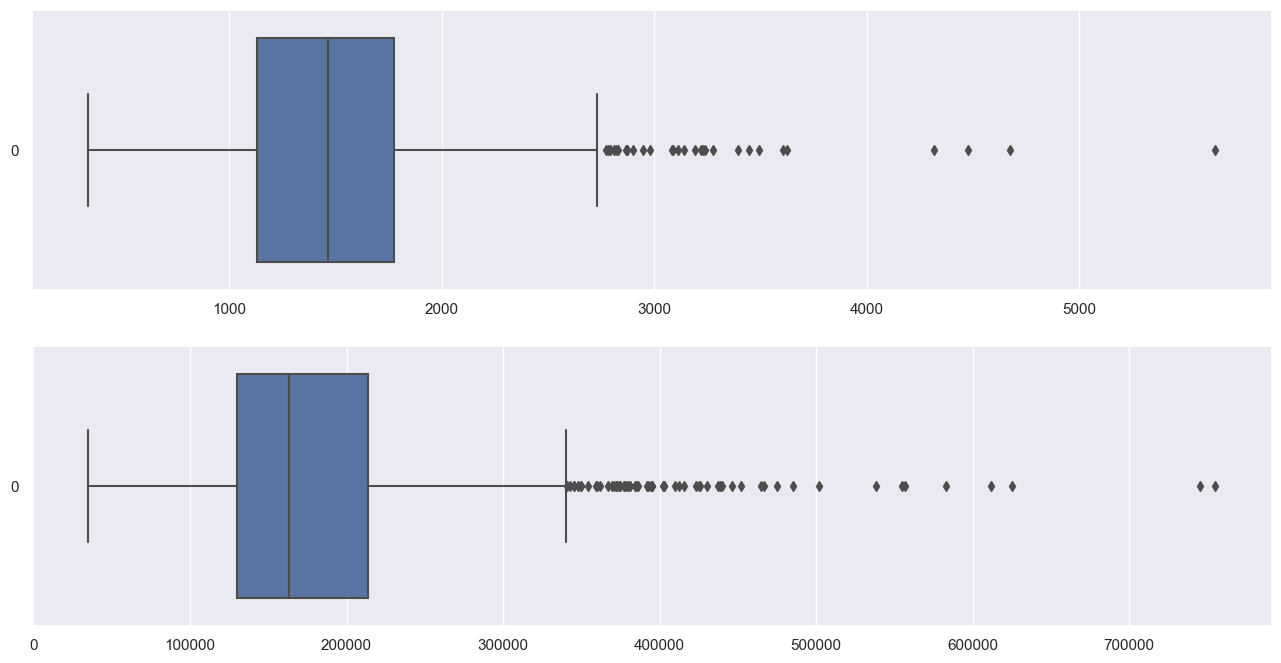

In [10]:
combined = pd.DataFrame(dataset_house[['SalePrice', 'GrLivArea']])  

f, axes = plt.subplots(2, 1, figsize=(16, 8))
sns.boxplot(data = combined["GrLivArea"], orient = "h", ax = axes[0])
sns.boxplot(data = combined["SalePrice"], orient = "h", ax = axes[1])

            
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    count = ( ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr) ))).sum()
    print(count)
    return df_out

filtered_combined = remove_outliers(combined)
filtered_combined

<AxesSubplot:>

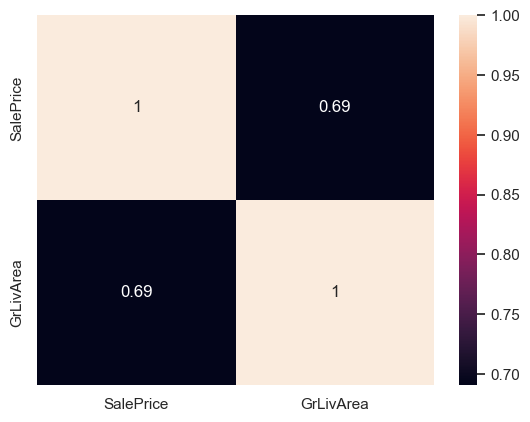

In [11]:
sns.heatmap(filtered_combined.corr(), annot=True)

Intercept 	: b = 32877.60
Coefficients 	: a = 93.68

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1867348534.44
Explained Variance (R^2) 	: 0.46

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1528812763.36
Explained Variance (R^2) 	: 0.53
Accuracy of the model:   	: 0.53


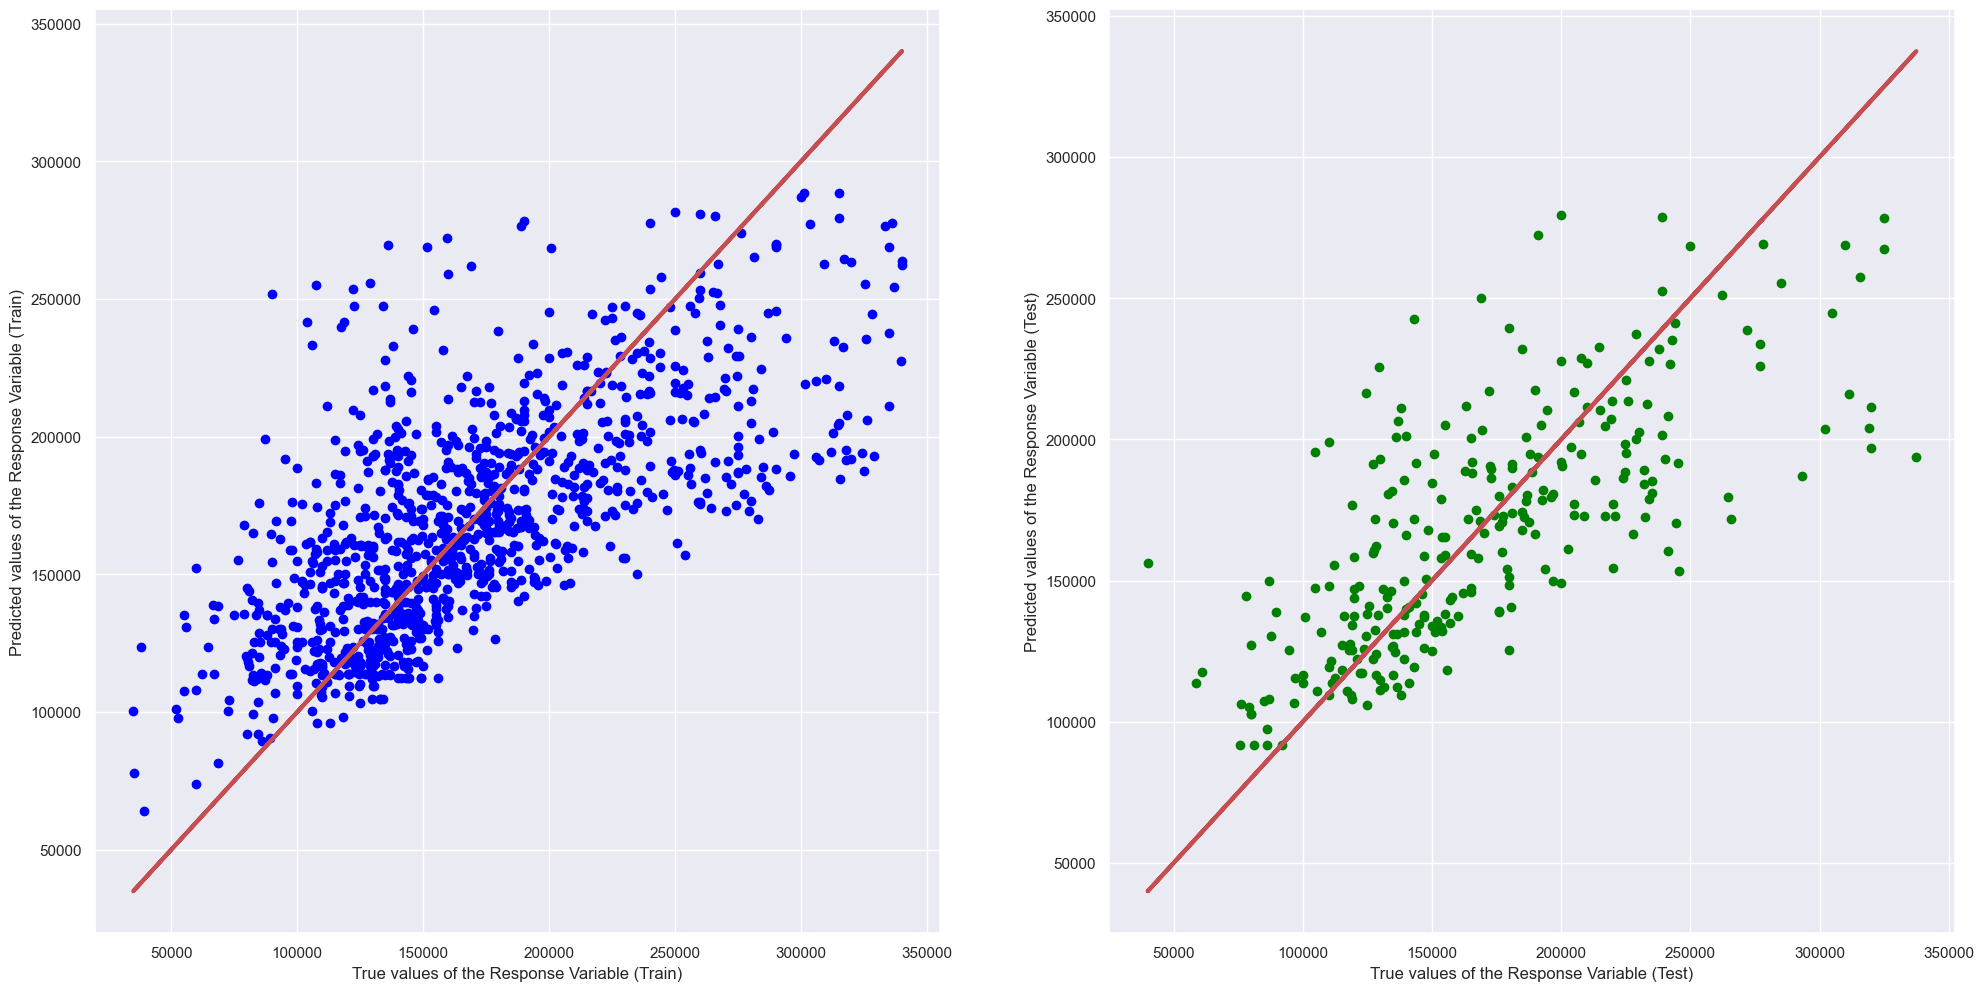

In [12]:
lr(X='GrLivArea', y='SalePrice', df=filtered_combined)